In [18]:
import pandas as pd

In [19]:
catalog=pd.read_csv("reed_full.csv")

In [20]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt

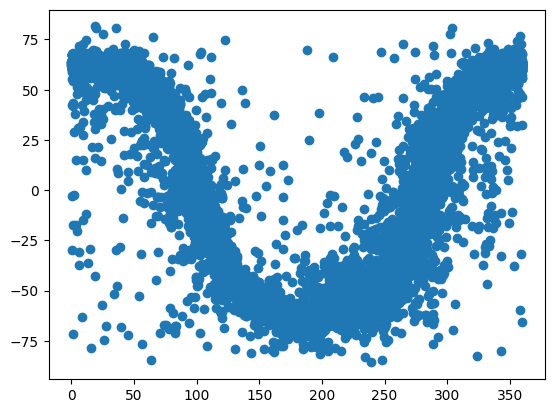

In [21]:
plt.scatter(catalog["_RAJ2000"],catalog["_DEJ2000"])

In [22]:
c1 = SkyCoord('04 00 00 +20 00 00', unit=(u.hourangle, u.deg))
c2 = SkyCoord('17 00 00 +20 00 00', unit=(u.hourangle, u.deg))
print(c1)
print(c2)

<SkyCoord (ICRS): (ra, dec) in deg
    (60., 20.)>
<SkyCoord (ICRS): (ra, dec) in deg
    (255., 20.)>


In [23]:
key_cut=(catalog["_RAJ2000"]>60) & (catalog["_RAJ2000"]<255)&(catalog["_DEJ2000"]>20) 

In [24]:
catalog=catalog.loc[key_cut]

In [25]:
print(catalog)

         _RAJ2000   _DEJ2000    ALS            Name   mag n_mag     RAJ2000   
2358    60.002083  57.631667   7846  LS   I +57 140  11.0     V  04 00 00.5  \
2359    60.097083  56.901389   7847  LS   I +56  98   9.2     V  04 00 23.3   
2361    60.177500  55.483889   7848  LS   I +55  58   9.3     V  04 00 42.6   
2362    60.195000  37.146667   7851  LS   V +37   1  10.2     V  04 00 46.8   
2363    60.227083  55.227222   7849  LS   V +55  59  10.3     V  04 00 54.5   
...           ...        ...    ...             ...   ...   ...         ...   
10591  233.679167  46.531389  19782     PG 1533+467  10.9     P  15 34 43.0   
10802  240.699583  46.036389  16442         HR 5982   4.7     V  16 02 47.9   
10916  243.254583  23.808889  19783     PG 1610+239  12.7     P  16 13 01.1   
11009  244.935000  46.313056  15092         TAU HER   3.9     V  16 19 44.4   
11108  246.995833  68.768056  16521         HR 6161   5.0     V  16 27 59.0   

         DEJ2000    GLON   GLAT  Simbad  
2358   +5

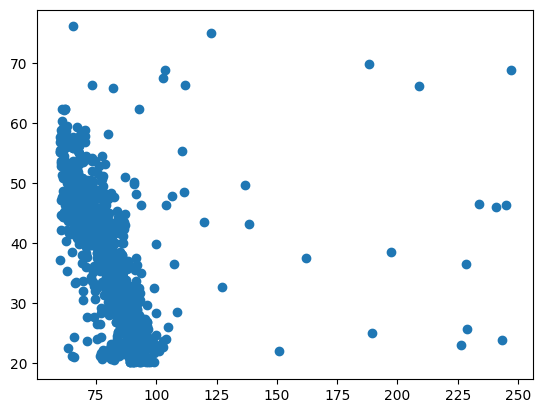

In [26]:
plt.scatter(catalog["_RAJ2000"],catalog["_DEJ2000"])

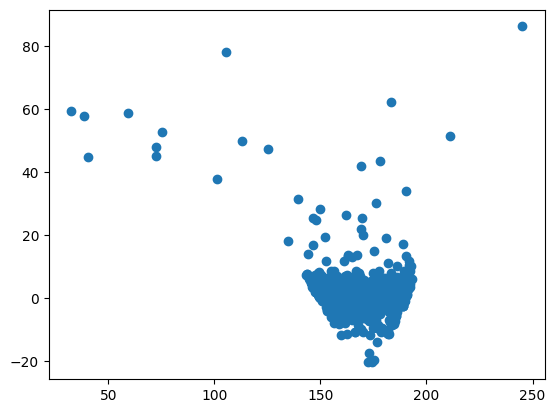

In [27]:
plt.scatter(catalog["GLON"],catalog["GLAT"])

In [28]:
print(catalog.count())

_RAJ2000    1173
_DEJ2000    1173
ALS         1173
Name        1173
mag         1172
n_mag       1173
RAJ2000     1173
DEJ2000     1173
GLON        1173
GLAT        1173
Simbad      1173
dtype: int64


In [108]:
catalog2=catalog.loc[catalog["mag"]<11]
names=catalog2["Name"].to_string(index=False)
print(names)

 LS   I +56  98
 LS   I +55  58
 LS   V +37   1
 LS   V +55  59
 LS   V +53  16
 LS   V +53  17
 LS   V +52  17
       HD 25215
       HD 25090
 LS   I +56  99
 LS   V +56  99
 LS   V +47   9
 LS   V +54   8
 LS   V +60   5
 LS   V +53  18
 LS   V +55  11
 LS   V +59 196
 LS   I +59 196
 LS   I +57 142
 LS   I +58 130
 LS   V +44   7
 LS   V +50   5
       Hilt 423
 LS   V +56  55
 LS   V +51  14
       HD 25639
        MCW 270
 LS   V +46   9
 LS   V +47  10
 LS   V +56  56
 LS   V +48  11
 LS   V +35   2
 LS   V +41   3
        HR 1297
 LS   V +57  58
 LS   V +41   4
 LS   V +44  11
 LS   V +46  11
 LS   V +46  13
 LS   V +41   5
 LS   V +48  15
 LS   V +52  19
        HR 1339
 LS   V +50   6
 LS   V +38   2
 LS   V +53  21
       HD 26684
 LS   V +46  15
 LS   V +57  59
 LS   V +42   4
        HR 1375
       HD 27778
 LS   V +53  22
 LS   V +51  19
 LS   V +46  16
 LS   V +46  17
 LS   V +50   7
 LS   V +48  16
 LS   V +40   6
 LS   V +56  59
 LS   V +48  17
 LS   V +59  23
 LS   V 

In [109]:
from astroquery.simbad import Simbad
customSimbad = Simbad()
customSimbad.add_votable_fields('rv_value', 'rot', 'sptype','flux(V)')
result_table = customSimbad.query_object(names)

/home/musca/aabhat/miniconda3/lib/python3.10/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 480 raised an error (recorded in the `errors` attribute of the result table): 'Rubin & Losee 9': No known catalog could be found
  warnings.warn("Warning: The script line number %i raised "


In [114]:
names_simbad=result_table["MAIN_ID"]
print(names_simbad[0])

HD 237204


In [71]:
from astroquery.gaia import Gaia

In [72]:
Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"

In [116]:
gaiadr3_table = Gaia.load_table('gaiadr3.gaia_source')

Retrieving table 'gaiadr3.gaia_source'


In [120]:
print(gaiadr3_table)

TAP Table name: gaiadr3.gaiadr3.gaia_source
Description: This table has an entry for every Gaia observed source as published with this data release. It contains the basic source parameters, in their final state as processed by the Gaia Data Processing and Analysis Consortium from the raw data coming from the spacecraft. The table is complemented with others containing information specific to certain kinds of objects (e.g.~Solar--system objects, non--single stars, variables etc.) and value--added processing (e.g.~astrophysical parameters etc.). Further array data types (spectra, epoch measurements) are presented separately via Datalink resources.
Num. columns: 152


<SkyCoord (ICRS): (ra, dec) in deg
    [( 60.097083, 56.901389), ( 60.1775  , 55.483889),
     ( 60.195   , 37.146667), ( 60.227083, 55.227222),
     ( 60.565417, 53.753056), ( 60.583333, 53.393333),
     ( 60.627917, 52.855556), ( 60.719583, 52.759444),
     ( 60.729583, 62.421389), ( 60.815   , 56.54    ),
     ( 60.815   , 56.54    ), ( 60.83625 , 47.605278),
     ( 60.84    , 55.034722), ( 61.014167, 60.281944),
     ( 61.09    , 53.328889), ( 61.102083, 56.005278),
     ( 61.112917, 59.155278), ( 61.112917, 59.155278),
     ( 61.23125 , 57.456944), ( 61.24375 , 58.659722),
     ( 61.2825  , 44.278056), ( 61.40375 , 50.76    ),
     ( 61.53375 , 62.101667), ( 61.775417, 56.242222),
     ( 61.937917, 51.452778), ( 61.955417, 62.332778),
     ( 61.964167, 62.33    ), ( 62.107083, 46.366111),
     ( 62.165   , 47.713056), ( 62.346667, 57.090833),
     ( 62.7375  , 48.186111), ( 63.015833, 35.359722),
     ( 63.152083, 42.118611), ( 63.213333, 22.413333),
     ( 63.7575  , 57.460278), 